In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
review_df = pd.read_csv("../sentiment/b_num_0.csv")
# Drop redundant columns
review_df = review_df.drop(['text', 'corrected_text'], axis=1)

review_df['date'] = pd.to_datetime(review_df['date'])

In [3]:
# Convert string type sentiment map to dictionary type and store all keys i.e. Sentiment noun, in one list
def get_sentiment_noun(sentiment_dict):
    sentiment_dict = eval(sentiment_dict)
    return sentiment_dict.keys()

# Convert string type sentiment map to dictionary type and store all values i.e. Sentiment integer, in one list
def get_sentiment_value(sentiment_dict):
    sentiment_dict = eval(sentiment_dict)
    return sentiment_dict.values()

In [4]:
# Split the exploded column into separate 'noun' and 'sentiment' columns
review_df['noun'] = review_df['review_sentiment'].apply(get_sentiment_noun)
review_df['value'] = review_df['review_sentiment'].apply(get_sentiment_value)
# Select relevant columns and explode the 'noun_sentiment' dictionary column
review_df = review_df.explode(['noun', 'value'])
# Dropping extra column
review_df = review_df.drop('review_sentiment', axis=1)

In [5]:
# Extracting year, month, day and hour from datetime column
review_df['year'] = review_df['date'].dt.year
review_df['month'] = review_df['date'].dt.month
review_df['day'] = review_df['date'].dt.day
review_df['hour'] = review_df['date'].dt.hour

In [6]:
review_df.head()

,business_id,stars,useful,date,noun,value,year,month,day,hour
0,Rt4xYQBWC8i2xqLp9dP7XQ,5.0,0.0,2016-02-12 14:30:58,others,1,2016,2,12,14
0,Rt4xYQBWC8i2xqLp9dP7XQ,5.0,0.0,2016-02-12 14:30:58,jim,1,2016,2,12,14
0,Rt4xYQBWC8i2xqLp9dP7XQ,5.0,0.0,2016-02-12 14:30:58,steaks,2,2016,2,12,14
0,Rt4xYQBWC8i2xqLp9dP7XQ,5.0,0.0,2016-02-12 14:30:58,cheese,2,2016,2,12,14
0,Rt4xYQBWC8i2xqLp9dP7XQ,5.0,0.0,2016-02-12 14:30:58,steak,2,2016,2,12,14


### Patterns
1. Hour of day
2. Day of week
3. Last day of Month
4. First day of Month
5. Day of month
6. Month of year
7. Quarter of review
8. Week of year
9. Public holidays
10. Time since business opening

- Perform review analysis for the above patterns.
- Perform day wise analysis.

1. Capture correlation between sentiment about attributes and business rating.
   1. Day 1 - food (2) service (1) rating 4.5.
   2. Day 2 - food(2) service(0) rating 4.
2. Find attributes that are the lowest rated.
3. Correlation between Food eaten and Customer rating.
4. Correlate review rating with time of day.
   1. if reviews are good in the evenings but bad in the morning, then try to tie it to one contributing factor.
   2. Statistical test to compare 2 numbers is required.


# To do (reviews do not contain user_id)
1. If a review has many upvotes. Give special attention to that user/review.
   1. May use the user as a promoter if they like the restaurant.
   2. If upvoted review is negative, then use that to learn about mistakes.

In [7]:
xclud_review_df = review_df[['business_id', 'stars', 'useful', 'date', 'year', 'month', 'day', 'hour']].drop_duplicates()

In [8]:
# Average star rating per operational day.
avg_star_per_operational_day = xclud_review_df.groupby(xclud_review_df['date'].dt.date)['stars'].aggregate('mean').reset_index()

In [9]:
import seaborn as sns

Better to plot this chart on a calender. Drill downable, Starting with average rating (per year) -> avg rating (per month) -> avg rating (per day)

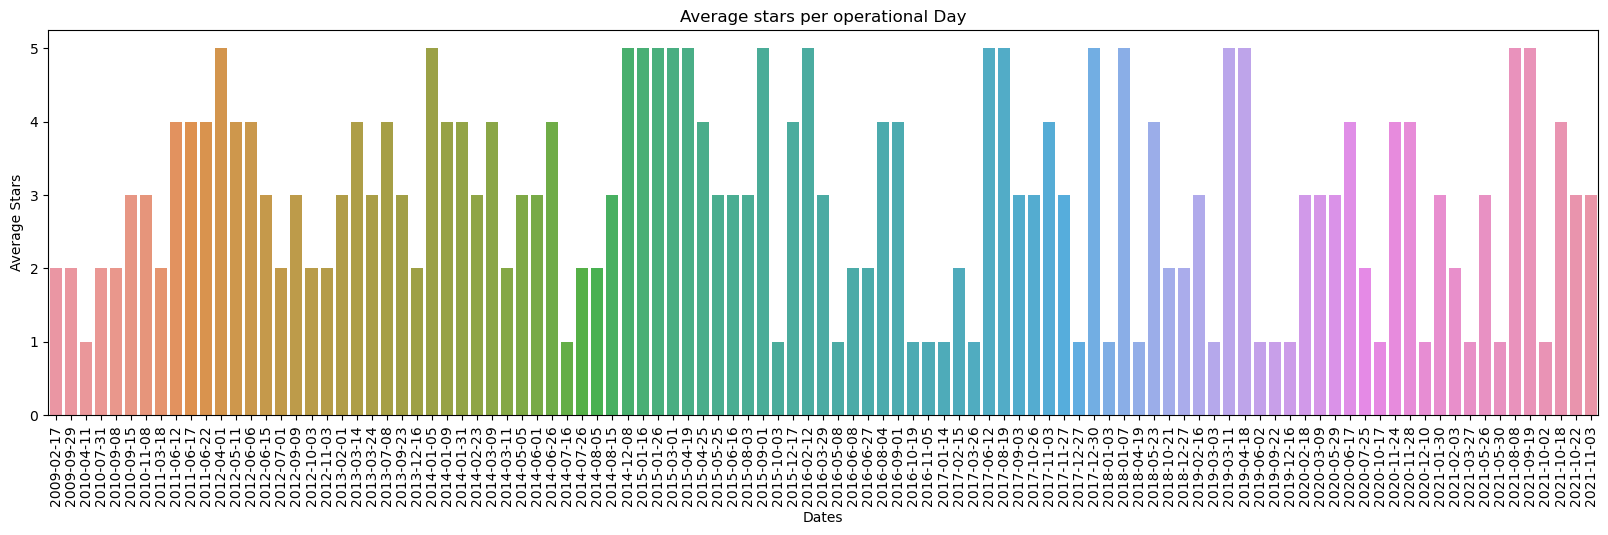

In [10]:
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_operational_day, x='date', y='stars')
plt.xlabel('Dates')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.title('Average stars per operational Day')
plt.show()

In [11]:
# Pattern's of analysis
pattern_of_analysis = ['hour_of_day', 'day_of_week', 'last_day_of_month', 
                       'first_day_of_month', 'day_of_month', 'month_of_year', 
                       'quarter_of_year', 'week_of_year', 'public_holidays']

# def hour_of_day():
    

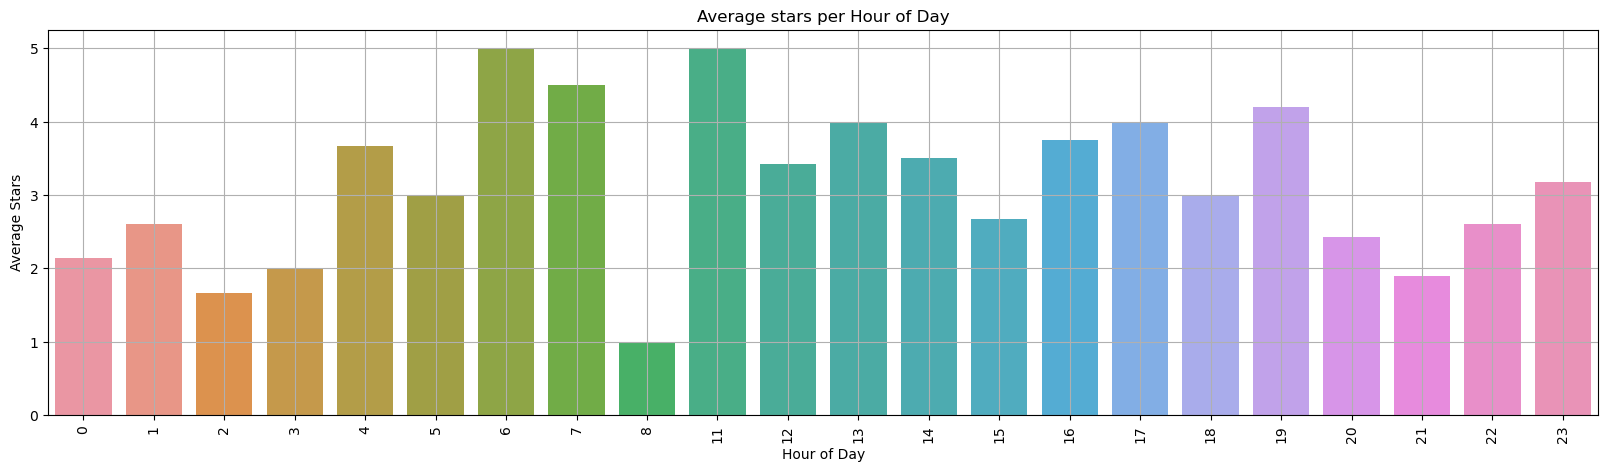

In [12]:
# Average stars per hour of day - throughout the restaurant's life

avg_star_per_hour_of_day = xclud_review_df.groupby(xclud_review_df['hour'])['stars'].aggregate('mean').reset_index()

plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_hour_of_day, x='hour', y='stars')
plt.xlabel('Hour of Day')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.title('Average stars per Hour of Day')
plt.grid()

plt.show()

# Developing drop down visualization

1. Year

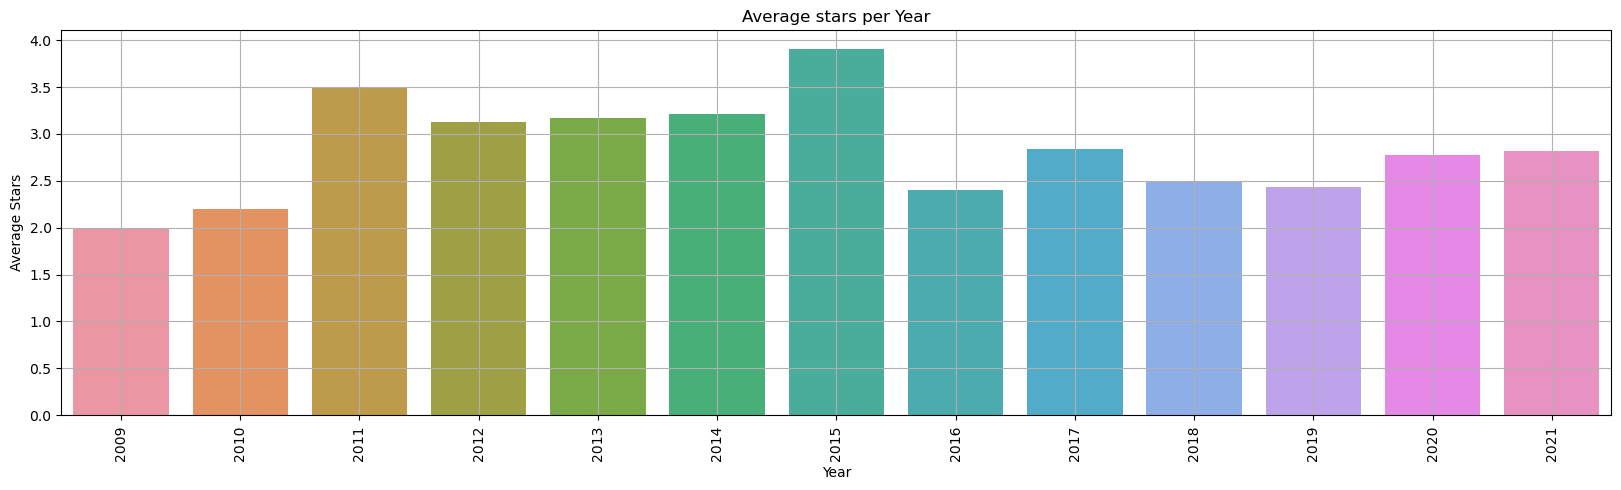

In [13]:
# 1. Filters: Business_id
# Group by year
# Calculate mean stars

avg_star_per_year = xclud_review_df.groupby(xclud_review_df['year'])['stars'].aggregate('mean').reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_year, x='year', y='stars')
plt.xlabel('Year')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.title('Average stars per Year')
plt.grid()

plt.show()

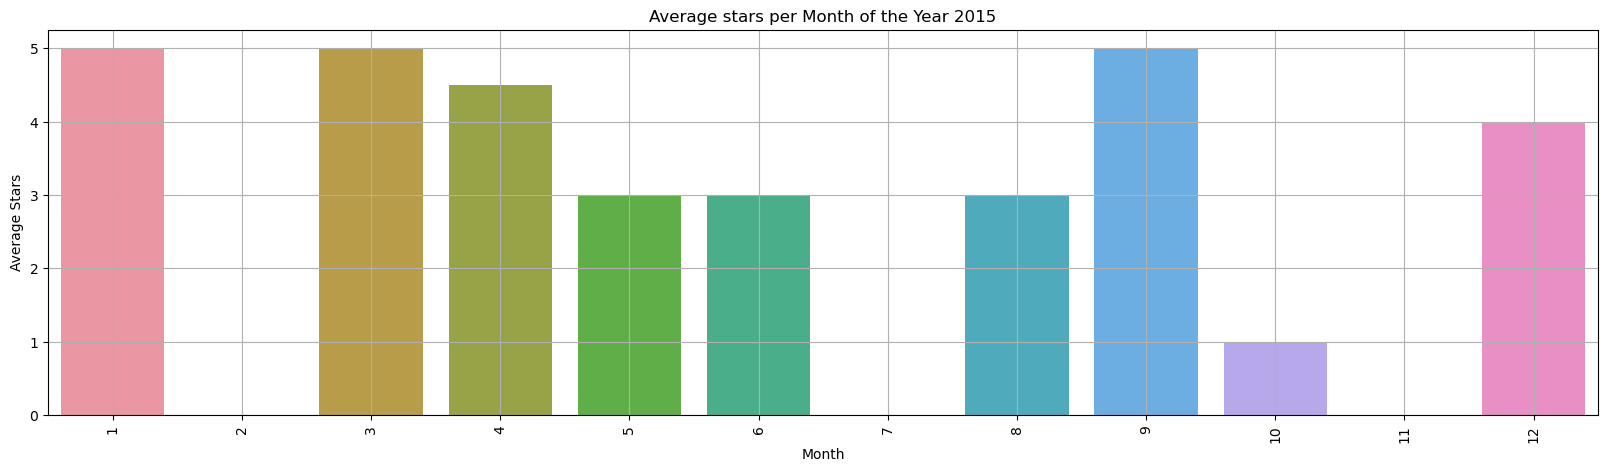

In [68]:
# Average rating per month of a year.
# Filters: Business_id, year
year_selected = 2015
avg_star_per_month_of_year = xclud_review_df[xclud_review_df['year'] == year_selected].groupby(xclud_review_df['month'])['stars'].aggregate('mean').reset_index()

# Months in a year
months = np.arange(1, 13, 1)

# Some months may not have any review. The plot must still show all the months on the x-axis. 
for m in months: 
  if m not in avg_star_per_month_of_year['month'].to_list():
    # print("months: ", m)
    avg_star_per_month_of_year.loc[len(avg_star_per_month_of_year)] = [m, 0]

# Plotting the figure.
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_month_of_year, x='month', y='stars')
plt.xlabel('Month')
plt.ylabel('Average Stars')
plt.grid()

plt.xticks(rotation=90)
plt.title(f'Average stars per Month of the Year {year_selected}')
plt.show()

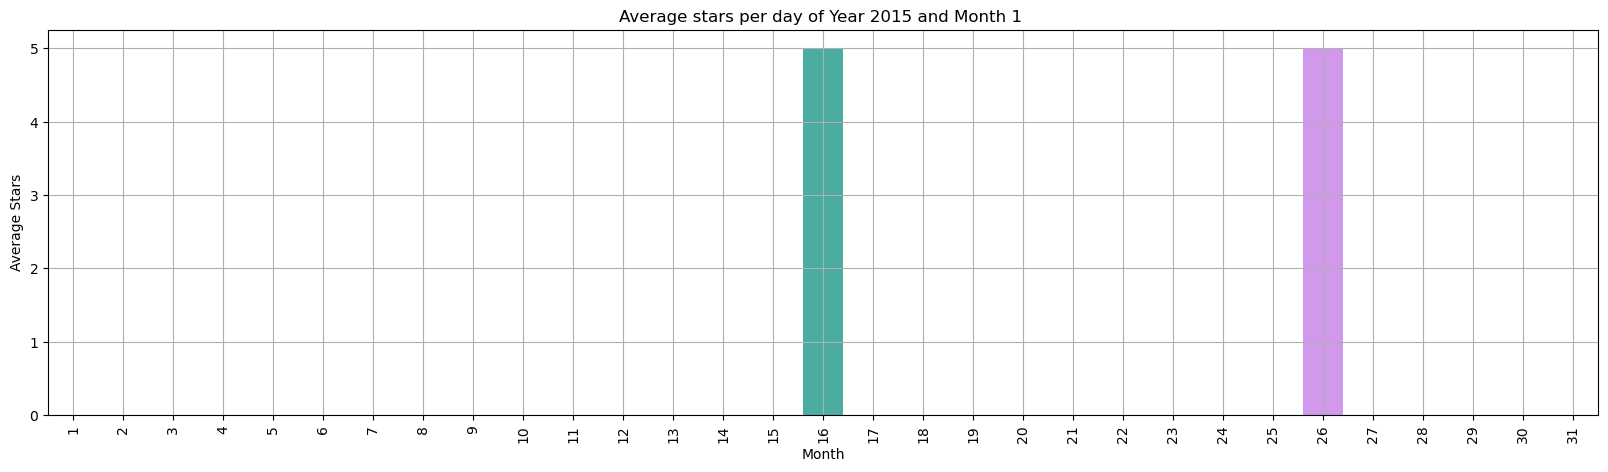

In [15]:
# Average rating per day of a month
# Filters: Business_id, year, month
year_selected = 2015
month_selected = 1

# year filter
year_filter = xclud_review_df[xclud_review_df['year'] == year_selected]
month_year_filter = year_filter[year_filter['month'] == month_selected]
avg_star_per_day_of_month = month_year_filter.groupby(month_year_filter['day'])['stars'].aggregate('mean').reset_index()

# Number of days in a month
days = np.arange(1, 32, 1)

# Some months may not have any review. The plot must still show all the months on the x-axis. 
for d in days: 
  if d not in avg_star_per_day_of_month['day'].to_list():
    avg_star_per_day_of_month.loc[len(avg_star_per_day_of_month)] = [d, 0]

# Plotting the figure.
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_day_of_month, x='day', y='stars')
plt.xlabel('Month')
plt.ylabel('Average Stars')
plt.grid()

plt.xticks(rotation=90)
plt.title(f'Average stars per day of Year {year_selected} and Month {month_selected} ')
plt.show()

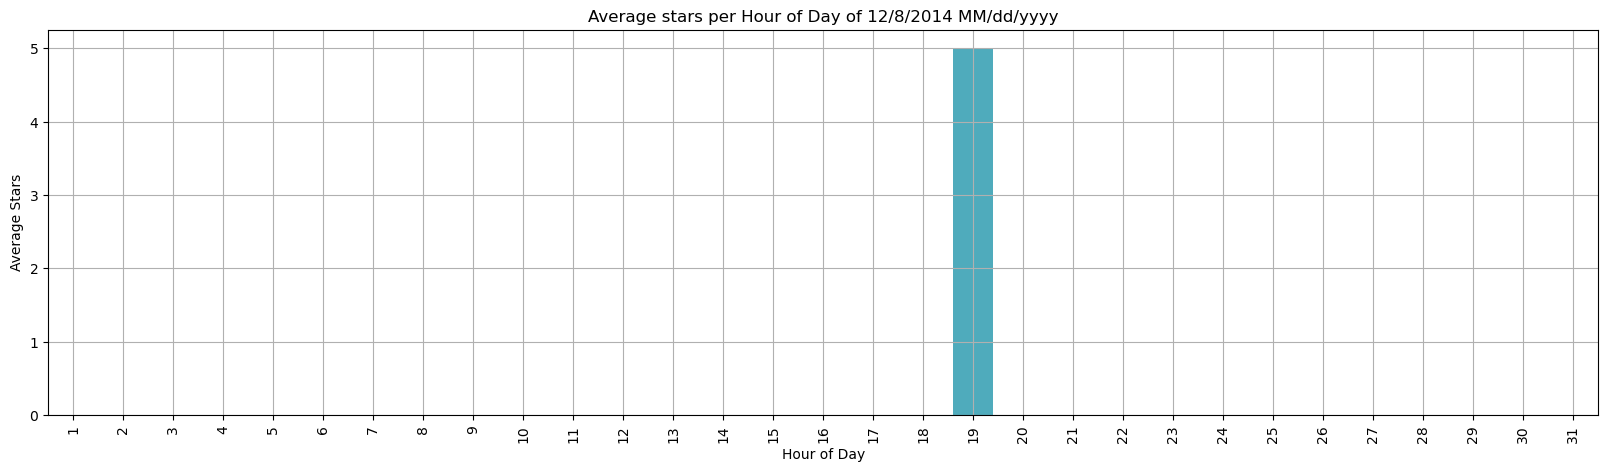

In [17]:
# Average rating per hour of day
# Filters: Business_id, year, month, day
year_selected = 2014
month_selected = 12
day_selected = 8

# year filter
year_filter = xclud_review_df[xclud_review_df['year'] == year_selected]
# month filter
month_year_filter = year_filter[year_filter['month'] == month_selected]
# Day filter
day_filter = month_year_filter[month_year_filter['day'] == day_selected]

# Calculate average rating
avg_star_per_hour_of_day = day_filter.groupby(day_filter['hour'])['stars'].aggregate('mean').reset_index()

# Number of days in a month
days = np.arange(1, 32, 1)

# Some months may not have any review. The plot must still show all the months on the x-axis. 
for d in days: 
  if d not in avg_star_per_hour_of_day['hour'].to_list():
    avg_star_per_hour_of_day.loc[len(avg_star_per_hour_of_day)] = [d, 0]

# Plotting the figure.
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_hour_of_day, x='hour', y='stars')
plt.xlabel('Hour of Day')
plt.ylabel('Average Stars')
plt.grid()
plt.xticks(rotation=90)
plt.title(f'Average stars per Hour of Day of {month_selected}/{day_selected}/{year_selected} MM/dd/yyyy')
plt.show()

## Visualization functionality

1. input: filters (business_id, year_selection, month_selection, day_selection), dataframe.
2. output: required visualization / appropriate dataframe.
3. functionality: 
   1. each filter parameter should be optional.
   2. if year_selection is not present, then show "mean rating per year"
   3. if only year_selection is present, then show "mean rating per month for that year".
   4. if year_selection and month_selection are present, then show "mean rating per day for that year and month".
   5. if year_selection, month_selection and day_selection are provided then show "mean rating per hour of day".
   6. Any combination of these 3 filters should work without errors.
   7. Make necessary changes to textual information w.r.t to the input filter changes. 

In [ ]:
year = 2015
month = 4
xclud_review_df.query(f'year == {year} & month == {month}')

In [191]:
def dataframe_filter(df, **kwargs):
   """ 
   column: may have 1 or more columns to filter the dataframe
   filter_param: may have 1 or more corresponding points to filter by
   permitted kwargs: "columns", "filter_param". 
   """
   query = []
   for key, val in kwargs.items():
      query.append(f'{key} == {val}')
   
   # create sql like query for filtering dataframe
   query = " & ".join(query)

   return df.query(query)

def generate_viz(df, **kwargs):
    """ 
    inputs:
        df: dataframe for which to plot the visualization.
        variable parameters: other strings required for plot "title", "label" etc 
    permitted var args: "year", "month", "day"
    """
    time_span = "Complete"
    year = 'Lifetime'
    columns = df.columns
    
    # parse the variable arguments dict for plot title
    if kwargs['year']:
        year = kwargs["year"]
        print("Year selected", year)
        time_span = "year"
    
    elif kwargs['month']:
        month_selected = kwargs['month']
        time_span = "month"
    
    elif kwargs['day']:
        day_selected = kwargs['day']
        time_span = "day"

    plt.figure(figsize=(20, 5))
    sns.barplot(data=df, x=columns[0], y='stars')
    plt.xlabel(f'{columns[0]}')
    plt.ylabel('Average Stars')
    plt.xticks(rotation=90)
    plt.title(f'Average stars per {columns[0].capitalize()} for the {time_span} - {year}')
    plt.grid()
    plt.show()

    
def create_aggregated_tables(df, business_id=None, year_selection=None, month_selection=None, day_selection=None, manual_selection=None):
    """
    business_id: business_id for which to generate the visualization.
    year_selection: "Year" filter for which you want visualization to be generated.
    month_selection: "Month" filter for which you want visualization to be generated.
    day_selection: "Day" filter for which you want visualization to be generated.
    manual_selection: a set of patterns of analysis, defined in "pattern_of_analysis". Each 
        pattern in this can be implemented at each level of filtering i.e. year_selection, month_selection and day_selection.
        IMPLEMENT IT LATER.
    """
    
    # If there is no year selection, then show the average restaurant rating per year, to begin with.
    if year_selection == month_selection == day_selection == manual_selection == None:
        # Default behavior to give average rating per year.
        # todo - give option (these apply to the whole lifetime of the restaurant)
        # 1. to generate avg rating per month (normalize the avg w.r.t number of days in a month, some months have 31 days, some have 30, feb has 28 days).
        # 2. to generate avg rating per day of week.
        # 3. to generate avg rating per hour of day.

        # Average rating of restaurant per year
        avg_star_rating = df.groupby(df['date'].dt.year)['stars'].aggregate('mean').reset_index()
    
    # if there is only year selection, then show avg restaurant rating per month for that year.
    if year_selection:
        # if month_selection:
        #     df = dataframe_filter(df, c)
        df = dataframe_filter(df, year=year_selection)
        avg_star_rating = df.groupby(df['month'])['stars'].aggregate('mean').reset_index()
        
        # Number of months in a year
        months = np.arange(1, 13, 1)
        # Some months may not have any review. The plot must still show all the months on the x-axis. 
        for m in months: 
            if m not in avg_star_rating['month'].to_list():
                # print("months missing", m)
                # filling in the zero star rating for missing months.
                avg_star_rating.loc[len(avg_star_rating)] = [m, 0]

    generate_viz(avg_star_rating, year=year_selection, month=None, day=None)
    # return avg_star_rating


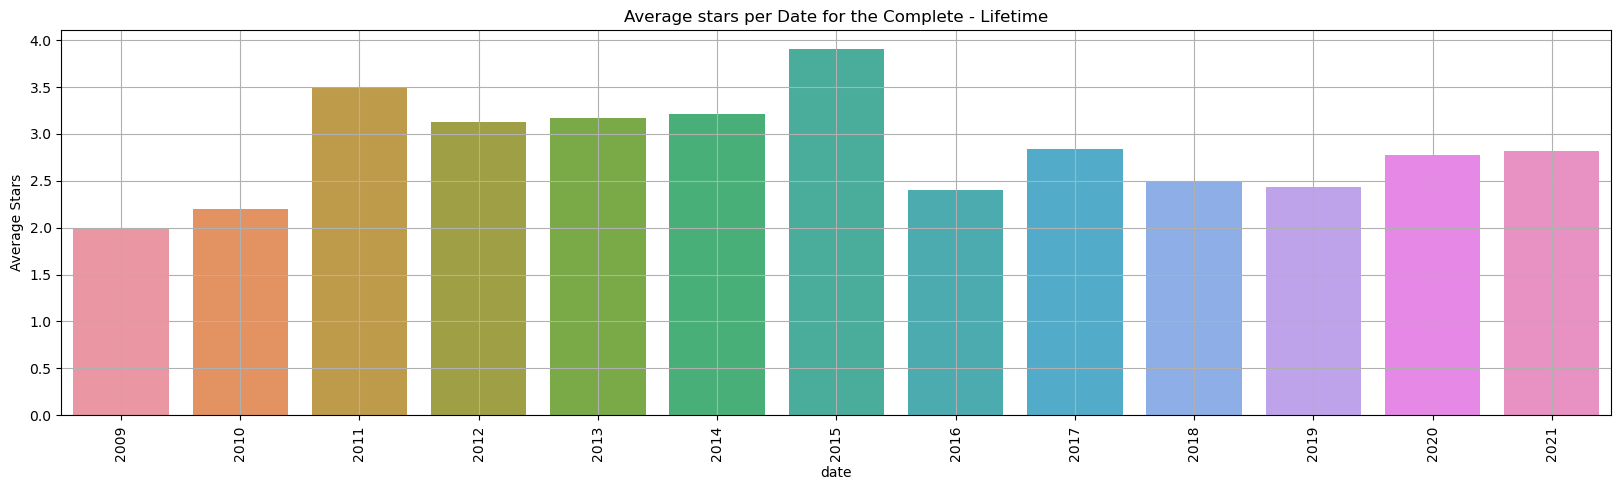

In [197]:
temp_df = create_aggregated_tables(xclud_review_df)

In [82]:
# 1. Filters: Business_id
# Group by year
# Calculate mean stars

columns = temp_df.columns

plt.figure(figsize=(20, 5))
sns.barplot(data=temp_df, x=columns[0], y='stars')
plt.xlabel(f'{columns[0]}')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.title(f'Average stars per {columns[0]} for the year')
plt.grid()

plt.show()

AttributeError: 'NoneType' object has no attribute 'columns'